Downloading S&P500 Price Data

In [187]:
# Call Yahoo Finance API to download daily stock and index prices
import yfinance as yf
import matplotlib
import pandas as pd
import os

In [188]:
# Downlad price history for a single symbol with .Ticker
nasdaq = yf.Ticker("^IXIC")

In [189]:
# Query Historical Prices
nasdaq = nasdaq.history(period="max")

In [190]:
nasdaq

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,0.0,0.0
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,0.0,0.0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,0.0,0.0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,0.0,0.0
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-18 00:00:00-04:00,19526.919922,19660.769531,19489.560547,19546.269531,7818790000,0.0,0.0
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,0.0,0.0
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,0.0,0.0


In [191]:
nasdaq.index

DatetimeIndex(['1971-02-05 00:00:00-05:00', '1971-02-08 00:00:00-05:00',
               '1971-02-09 00:00:00-05:00', '1971-02-10 00:00:00-05:00',
               '1971-02-11 00:00:00-05:00', '1971-02-12 00:00:00-05:00',
               '1971-02-16 00:00:00-05:00', '1971-02-17 00:00:00-05:00',
               '1971-02-18 00:00:00-05:00', '1971-02-19 00:00:00-05:00',
               ...
               '2025-06-11 00:00:00-04:00', '2025-06-12 00:00:00-04:00',
               '2025-06-13 00:00:00-04:00', '2025-06-16 00:00:00-04:00',
               '2025-06-17 00:00:00-04:00', '2025-06-18 00:00:00-04:00',
               '2025-06-20 00:00:00-04:00', '2025-06-23 00:00:00-04:00',
               '2025-06-24 00:00:00-04:00', '2025-06-25 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=13712, freq=None)

#### Cleaning and Visualizing NASDAQ Data

<Axes: xlabel='Date'>

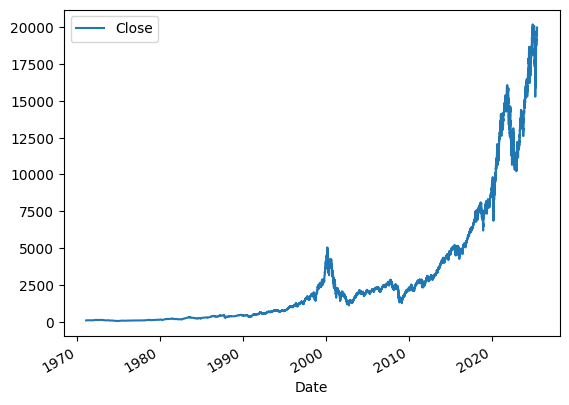

In [192]:
# Plot trend of data using DateTime index
nasdaq.plot.line(y="Close", use_index=True)

In [193]:
# Data cleaning to remove unessacary columns
del nasdaq["Dividends"]
del nasdaq["Stock Splits"]

#### Setting target for Machine Learning

In [194]:
# Set Target (Determing price direction not absolute value)
nasdaq["Tomorrow"] = nasdaq["Close"].shift(-1)

nasdaq

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,100.839996
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,100.760002
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,100.690002
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,101.449997
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,102.050003
...,...,...,...,...,...,...
2025-06-18 00:00:00-04:00,19526.919922,19660.769531,19489.560547,19546.269531,7818790000,19447.410156
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,19630.970703
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297


In [195]:
# Set Target
nasdaq["Target"] = (nasdaq["Tomorrow"] > nasdaq["Close"]).astype(int)

nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,100.839996,1
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,100.760002,0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,100.690002,0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,101.449997,1
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,102.050003,1
...,...,...,...,...,...,...,...
2025-06-18 00:00:00-04:00,19526.919922,19660.769531,19489.560547,19546.269531,7818790000,19447.410156,0
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,19630.970703,1
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297,1


In [196]:
# Only use data after the year 2000
nasdaq = nasdaq.loc["2000-01-01":].copy()

nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,4186.189941,4192.189941,3989.709961,4131.149902,1510070000,3901.689941,0
2000-01-04 00:00:00-05:00,4020.000000,4073.250000,3898.229980,3901.689941,1511840000,3877.540039,0
2000-01-05 00:00:00-05:00,3854.350098,3924.209961,3734.870117,3877.540039,1735670000,3727.129883,0
2000-01-06 00:00:00-05:00,3834.439941,3868.760010,3715.620117,3727.129883,1598320000,3882.620117,1
2000-01-07 00:00:00-05:00,3711.090088,3882.669922,3711.090088,3882.620117,1634930000,4049.669922,1
...,...,...,...,...,...,...,...
2025-06-18 00:00:00-04:00,19526.919922,19660.769531,19489.560547,19546.269531,7818790000,19447.410156,0
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,19630.970703,1
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297,1


#### Train a machine learning model

In [197]:
# Random Forest can pick up non linear relationships
from sklearn.ensemble import RandomForestClassifier

# n_estimators is number of Random decision models I want to train (test different values higher could mean better accuracy)
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1) # min_sa helps stop overfitting, random_state will rerun predicatable model

train = nasdaq.iloc[:-100] # All rows except last 100
test = nasdaq.iloc[-100:] # Last 100 rows

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,100
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [198]:
from sklearn.metrics import precision_score # Adjust metric to measure preformance

preds =model.predict(test[predictors])

# put into Pandas dataframe
preds = pd.Series(preds, index=test.index)

preds

Date
2025-01-31 00:00:00-05:00    0
2025-02-03 00:00:00-05:00    1
2025-02-04 00:00:00-05:00    1
2025-02-05 00:00:00-05:00    1
2025-02-06 00:00:00-05:00    1
                            ..
2025-06-18 00:00:00-04:00    1
2025-06-20 00:00:00-04:00    1
2025-06-23 00:00:00-04:00    1
2025-06-24 00:00:00-04:00    0
2025-06-25 00:00:00-04:00    0
Length: 100, dtype: int64

In [199]:
precision_score(test["Target"], preds)

0.5632183908045977

<Axes: xlabel='Date'>

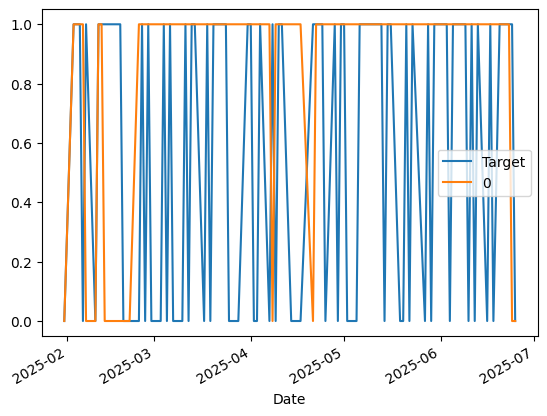

In [200]:
# Plot predictions and combine actul values with predicted values 
combined = pd.concat([test["Target"], preds], axis=1)

combined.plot()

#### Building a Backtesting System

In [201]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [202]:
# Get predictions for alot of different years to have more confidence in model
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [203]:
predictions = backtest(nasdaq, model, predictors)

In [204]:
predictions["Predictions"].value_counts()

Predictions
0    2419
1    1489
Name: count, dtype: int64

In [205]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5520483546004029

In [206]:
# Number of Days NASDAQ actually rose
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.557574
0    0.442426
Name: count, dtype: float64

#### Adding Additional Predictiors to the Model

In [207]:
# Create varitey of rolling averages
horizons = [2,5,60,250,1000] # Horizons on how to look at rolling means. 2 days, 5 trading days,3 months 60 trading days, 250 = 1 year, 4 years =1000
new_predictors = []

for horizon in horizons:
    rolling_averages = nasdaq.rolling(horizon).mean()

    ratio_column = f"Close_ratio_{horizon}"
    nasdaq[ratio_column] = nasdaq["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    nasdaq[trend_column] = nasdaq.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]


In [208]:
nasdaq = nasdaq.dropna()
nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1970.369995,1979.739990,1970.369995,1973.140015,530810000,2006.479980,1,1.000992,1.0,1.004248,3.0,1.021215,33.0,1.201956,131.0,0.876518,494.0
2003-12-29 00:00:00-05:00,1976.930054,2006.479980,1976.930054,2006.479980,1413210000,2009.880005,1,1.008378,2.0,1.015484,4.0,1.036947,33.0,1.220270,132.0,0.892079,495.0
2003-12-30 00:00:00-05:00,2003.979980,2010.130005,1997.819946,2009.880005,1544270000,2003.369995,0,1.000847,2.0,1.011667,4.0,1.037549,33.0,1.220482,132.0,0.894334,496.0
2003-12-31 00:00:00-05:00,2010.640015,2015.229980,1996.619995,2003.369995,1775710000,2006.680054,1,0.998378,1.0,1.005496,3.0,1.033211,32.0,1.214711,131.0,0.892121,496.0
2004-01-02 00:00:00-05:00,2011.079956,2022.369995,1999.770020,2006.680054,1666780000,2047.359985,1,1.000825,1.0,1.003385,4.0,1.034040,32.0,1.214993,131.0,0.894342,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-17 00:00:00-04:00,19627.080078,19666.560547,19485.439453,19521.089844,8519930000,19546.269531,1,0.995408,1.0,0.996915,2.0,1.081833,34.0,1.061653,143.0,1.320859,537.0
2025-06-18 00:00:00-04:00,19526.919922,19660.769531,19489.560547,19546.269531,7818790000,19447.410156,0,1.000645,1.0,0.998911,3.0,1.081872,34.0,1.062633,143.0,1.322100,537.0
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,19630.970703,1,0.997465,1.0,0.996048,2.0,1.075234,33.0,1.056862,143.0,1.314961,537.0


#### Improving the model

In [209]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [210]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    # Make model more confident in predictions
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [211]:
predictions = backtest(nasdaq, model, new_predictors)

In [212]:
predictions["Predictions"].value_counts()

Predictions
0.0    2515
1.0     392
Name: count, dtype: int64

In [213]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5331632653061225